# **Bag of Words**

In [1]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ["O tolo pensa que é sábio,",
          "mas a pessoa sábio sabe que é um tolo"]

In [2]:
vect = CountVectorizer(token_pattern=r'\b\w+\b')
vect.fit(corpus)

print(f"Tamanho do vocabulário: {len(vect.vocabulary_)}")
print(f"Conteúdo do Vocabulário:\n {vect.vocabulary_}")

Tamanho do vocabulário: 11
Conteúdo do Vocabulário:
 {'o': 2, 'tolo': 8, 'pensa': 3, 'que': 5, 'é': 10, 'sábio': 7, 'mas': 1, 'a': 0, 'pessoa': 4, 'sabe': 6, 'um': 9}


In [3]:
bag_of_words = vect.transform(corpus)
print("Matriz esparsa: ", repr(bag_of_words))

Matriz esparsa:  <2x11 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>


In [4]:
print("Array da matriz: ", bag_of_words.toarray())

Array da matriz:  [[0 0 1 1 0 1 0 1 1 0 1]
 [1 1 0 0 1 1 1 1 1 1 1]]


In [5]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

print('Número de palavras irrelevantes: ', len(ENGLISH_STOP_WORDS))
print('As primeiras 10 palavras irrelevantes: ', list(ENGLISH_STOP_WORDS)[:10])

Número de palavras irrelevantes:  318
As primeiras 10 palavras irrelevantes:  ['that', 'very', 'beforehand', 'eg', 'eight', 'both', 'again', 'five', 'now', 'empty']


# **Pática Bag-of-Words**

In [6]:
! wget -nc http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz -P data
! tar xzf data/aclImdb_v1.tar.gz --skip-old-files -C data

File ‘data/aclImdb_v1.tar.gz’ already there; not retrieving.



In [7]:
! rm -rf data/aclImdb/train/unsup

In [8]:
from sklearn.datasets import load_files
import numpy as np
import pandas as pd

reviews_train = load_files('data/aclImdb/train')
text_train, y_train = reviews_train.data, reviews_train.target

print("Tamanho do text_train: ", len(text_train))
print("6a amostra: ", text_train[6])
print("6a amostra: ", y_train[6])

Tamanho do text_train:  25000
6a amostra:  b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.<br /><br />Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life. <br /><br />I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."
6a amostra:  1


In [9]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [10]:
print("6a amostra: ", text_train[6])

6a amostra:  b"This movie has a special way of telling the story, at first i found it rather odd as it jumped through time and I had no idea whats happening.  Anyway the story line was although simple, but still very real and touching. You met someone the first time, you fell in love completely, but broke up at last and promoted a deadly agony. Who hasn't go through this? but we will never forget this kind of pain in our life.   I would say i am rather touched as two actor has shown great performance in showing the love between the characters. I just wish that the story could be a happy ending."


In [11]:
print("Amostras por classe (conjunto de treino): ", np.bincount(y_train))

Amostras por classe (conjunto de treino):  [12500 12500]


In [12]:
reviews_test = load_files('data/aclImdb/test')

In [13]:
text_test, y_test = reviews_test.data, reviews_test.target

print("Tamanho do text_train: ", len(text_test))
print("6a amostra: ", text_test[6])
print("6a amostra: ", y_test[6])

text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Tamanho do text_train:  25000
6a amostra:  b"I think this is one hell of a movie...........We can see Steven fighting around with his martial art stuff again and like in all Segal movies there's a message in it, without the message it would be one of many action/fighting movies but the message is what makes segal movies great and special."
6a amostra:  1


In [14]:
print("Amostras por classe (conjunto de treino): ", np.bincount(y_train))

Amostras por classe (conjunto de treino):  [12500 12500]


In [15]:
# OBS: Use o conjunto de dados inteiro para fazer validação cruzada
#      Nesse caso, usaremos so o dado de teste devido a limitações do Google Colab
# text_data = np.concatenate([text_train, text_test])
# print(text_data.shape)

# y = np.concatenate([y_train, y_test])
# print(text_data.shape)

text_data, y = text_train, y_train

In [16]:
vect = CountVectorizer()
vect.fit(text_data)
X = vect.transform(text_data)

print("text_data:\n", X.toarray()[:5])

text_data:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [17]:
X.toarray().shape

(25000, 74849)

In [18]:
feature_names = vect.get_feature_names_out()

print("Primeiras 20 características:\n", feature_names[:20])
print("Características de 20010 ate 20030:\n", feature_names[20010:20030])
print("Cada 2000 características:\n", feature_names[::2000])

Primeiras 20 características:
 ['00' '000' '0000000000001' '00001' '00015' '000s' '001' '003830' '006'
 '007' '0079' '0080' '0083' '0093638' '00am' '00pm' '00s' '01' '01pm' '02']
Características de 20010 ate 20030:
 ['dratted' 'draub' 'draught' 'draughts' 'draughtswoman' 'draw' 'drawback'
 'drawbacks' 'drawer' 'drawers' 'drawing' 'drawings' 'drawl' 'drawled'
 'drawling' 'drawn' 'draws' 'draza' 'dre' 'drea']
Cada 2000 características:
 ['00' 'aesir' 'aquarian' 'barking' 'blustering' 'bête' 'chicanery'
 'condensing' 'cunning' 'detox' 'draper' 'enshrined' 'favorit' 'freezer'
 'goldman' 'hasan' 'huitieme' 'intelligible' 'kantrowitz' 'lawful' 'maars'
 'megalunged' 'mostey' 'norrland' 'padilla' 'pincher' 'promisingly'
 'receptionist' 'rivals' 'schnaas' 'shunning' 'sparse' 'subset'
 'temptations' 'treatises' 'unproven' 'walkman' 'xylophonist']


In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lregression = LogisticRegression()
scores = cross_val_score(lregression, X, y, cv=5)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [20]:
print("Ácurácia média da validação cruzada: ", np.mean(scores))

Ácurácia média da validação cruzada:  0.8819199999999998


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.001, 0.1, 1.],
              'penalty': ['l2', 'l1']}

grid = GridSearchCV(lregression, param_grid, cv=3)

grid.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 1.0], 'penalty': ['l2', 'l1']})

In [22]:
print("Melhor combinação: ", grid.best_score_)
print("Melhores combinações de parâmetros: ", grid.best_params_)

Melhor combinação:  0.8841999420317586
Melhores combinações de parâmetros:  {'C': 0.1, 'penalty': 'l2'}


In [23]:
score_teste = grid.score(X, y)

print("Ácurácia do teste: ", score_teste)

Ácurácia do teste:  0.96684


In [24]:
vect = CountVectorizer(min_df=5, stop_words='english').fit(text_data)
X = vect.transform(text_data)

In [25]:
feature_names = vect.get_feature_names_out()

print("Primeiras 20 características:\n", feature_names[:20])
print("Características de 20010 ate 20030:\n", feature_names[20010:20030])
print("Cada 2000 características:\n", feature_names[::2000])
print("Numero de características: ", len(feature_names))

Primeiras 20 características:
 ['00' '000' '007' '00s' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10'
 '100' '1000' '100th' '101' '102' '103']
Características de 20010 ate 20030:
 ['resume' 'resumed' 'resumes' 'resurgence' 'resurrect' 'resurrected'
 'resurrecting' 'resurrection' 'resurrects' 'retail' 'retain' 'retained'
 'retaining' 'retains' 'retakes' 'retaliate' 'retaliation' 'retard'
 'retarded' 'retards']
Cada 2000 características:
 ['00' 'balls' 'champions' 'damages' 'empathy' 'gaunt' 'immersive'
 'librarians' 'mythic' 'pleas' 'restriction' 'sleep' 'tenacity'
 'vulnerable']
Numero de características:  26966


In [26]:
param_grid = {'C': [0.001, 0.1, 1.],
              'penalty': ['l2', 'l1']}

grid = GridSearchCV(lregression, param_grid, cv=3)

grid.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.1, 1.0], 'penalty': ['l2', 'l1']})

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=5)
tfidf.fit(text_data)

tf_X = tfidf.transform(text_data)


In [28]:
print("Primeira amostra: ", tf_X.toarray()[0].max())

Primeira amostra:  0.2790717705721132


In [30]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

pipe = make_pipeline(TfidfVectorizer(min_df=5),
                     LogisticRegression())


param_grid = {'logisticregression__C': [0.001, 0.01, 0.1]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_data, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tfidfvectorizer',
                                        TfidfVectorizer(min_df=5)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1]})

In [33]:
print("Melhor score: ", grid.best_score_)
print("Melhores hiperparâmetros: ", grid.best_params_)

Melhor score:  0.84996
Melhores hiperparâmetros:  {'logisticregression__C': 0.1}


In [34]:
!pip install mglearn

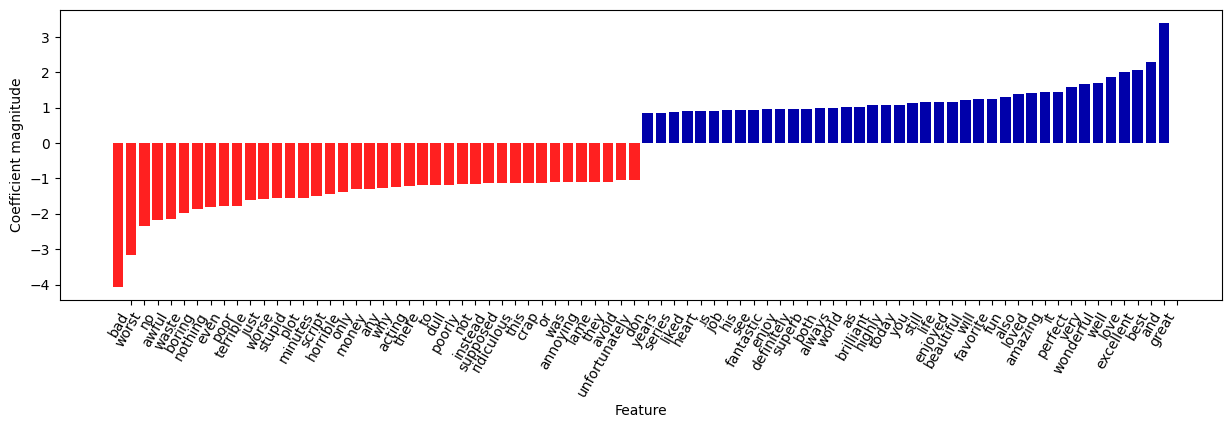

In [35]:
import mglearn

feature_names = grid.best_estimator_[0].get_feature_names_out()

mglearn.tools.visualize_coefficients(
    grid.best_estimator_[1].coef_,
    feature_names,
    n_top_features=40
)

# **Stemming (Radicalização) e Lemmatization**

In [36]:
! pip install nltk spacy

In [37]:
import spacy
import nltk

en_lemma = spacy.load('en_core_web_sm')

stemmer = nltk.stem.PorterStemmer()

def compare_normalization(doc):
  doc_spacy = en_lemma(doc)

  print("Lemmatization:")
  print([token.lemma_ for token in doc_spacy])

  print("\n")

  print("Stemming:")
  print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [38]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

Lemmatization:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'I', 'be', 'scared', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


Stemming:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', 'am', 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [39]:
import re

def custom_tokenizer(doc):
  regexp = re.compile('(?u)\\b\\w\\w+\\b')
  en_lemma = spacy.load('en_core_web_sm')
  en_lemma.tokenizer.token_match = regexp.match

  doc_spacy = en_lemma(doc)
  return [token.lemma_ for token in doc_spacy]


lemma_vect = CountVectorizer(tokenizer=custom_tokenizer)

In [40]:
lemma_vect.fit_transform(np.array(["Our meeting today was worse than yesterday, ",
                       "I'm scared of meeting the clients tomorrow."]))


lemma_vect.get_feature_names_out()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['I', 'bad', 'be', 'client', 'meet', 'meeting', 'of', 'our',
       'scared', 'than', 'the', 'today', 'tomorrow.', 'yesterday,'],
      dtype=object)

In [ ]:
from sklearn.model_selection import cross_val_score

X_lemma = lemma_vect.fit_transform(text_data)

model = LogisticRegression(C=.1)

score = cross_val_score(model, X_lemma, y, cv=5)

print(score.mean())

# **Bag-of-nGrams**

In [41]:
corpus = ["O tolo pensa que é sábio,",
          "mas a pessoa sábio sabe que é um tolo"]

vect = CountVectorizer(ngram_range=(1, 1))
vect.fit(corpus)

print(f"Tamanho do vocabulário: {len(vect.vocabulary_)}")
print(f"Conteúdo do Vocabulário:\n {vect.vocabulary_}")

Tamanho do vocabulário: 8
Conteúdo do Vocabulário:
 {'tolo': 6, 'pensa': 1, 'que': 3, 'sábio': 5, 'mas': 0, 'pessoa': 2, 'sabe': 4, 'um': 7}


In [42]:
vect = CountVectorizer(ngram_range=(1, 2))
vect.fit(corpus)

print(f"Tamanho do vocabulário: {len(vect.vocabulary_)}")
print(f"Conteúdo do Vocabulário:\n {vect.vocabulary_}")

Tamanho do vocabulário: 17
Conteúdo do Vocabulário:
 {'tolo': 13, 'pensa': 2, 'que': 6, 'sábio': 11, 'tolo pensa': 14, 'pensa que': 3, 'que sábio': 7, 'mas': 0, 'pessoa': 4, 'sabe': 9, 'um': 15, 'mas pessoa': 1, 'pessoa sábio': 5, 'sábio sabe': 12, 'sabe que': 10, 'que um': 8, 'um tolo': 16}


In [43]:
vect = CountVectorizer(ngram_range=(2, 2))
vect.fit(corpus)

print(f"Tamanho do vocabulário: {len(vect.vocabulary_)}")
print(f"Conteúdo do Vocabulário:\n {vect.vocabulary_}")

Tamanho do vocabulário: 9
Conteúdo do Vocabulário:
 {'tolo pensa': 7, 'pensa que': 1, 'que sábio': 3, 'mas pessoa': 0, 'pessoa sábio': 2, 'sábio sabe': 6, 'sabe que': 5, 'que um': 4, 'um tolo': 8}


In [44]:
vect = CountVectorizer(ngram_range=(2, 3))
vect.fit(corpus)

print(f"Tamanho do vocabulário: {len(vect.vocabulary_)}")
print(f"Conteúdo do Vocabulário:\n {vect.vocabulary_}")

Tamanho do vocabulário: 16
Conteúdo do Vocabulário:
 {'tolo pensa': 13, 'pensa que': 2, 'que sábio': 6, 'tolo pensa que': 14, 'pensa que sábio': 3, 'mas pessoa': 0, 'pessoa sábio': 4, 'sábio sabe': 11, 'sabe que': 9, 'que um': 7, 'um tolo': 15, 'mas pessoa sábio': 1, 'pessoa sábio sabe': 5, 'sábio sabe que': 12, 'sabe que um': 10, 'que um tolo': 8}
